# Simple Linear Regression

In [301]:
import numpy as np
import torch
from torch.autograd import Variable
from random import uniform
import matplotlib.pyplot as plt

The following variables define the breadth of the generated data sets used for training:

In [302]:
sampleSetSize = 17
startX = 0
maxNoise = 1
learningRate = 0.01 
epochs = 1000

# Enable GPU
enableGpu = torch.cuda.is_available()
print("Is GPU Enabled?  " + str(enableGpu))

Is GPU Enabled?  False


## Generate Sample Data

3x + 4

In [303]:
values_x = [i for i in range(sampleSetSize)]
values_y = [((3 * i) + 4 + uniform(maxNoise * -1, maxNoise)) for i in values_x]

## Convert data to Numpy/Pytorch friendly structures

In [304]:
train_x = np.array(values_x, dtype=np.float32)
train_x = train_x.reshape(-1, 1)

train_y = np.array(values_y, dtype=np.float32)
train_y = train_y.reshape(-1, 1)

## Define Model Architecture

In [305]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [306]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'

model = linearRegression(inputDim, outputDim)
if enableGpu:
    model.cuda()

In [307]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

## Train the Model

In [308]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if enableGpu:
        inputs = Variable(torch.from_numpy(train_x).cuda())
        labels = Variable(torch.from_numpy(train_y).cuda())
    else:
        inputs = Variable(torch.from_numpy(train_x).requires_grad_())
        labels = Variable(torch.from_numpy(train_y))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1326.0362548828125
epoch 1, loss 798.13134765625
epoch 2, loss 481.3677062988281
epoch 3, loss 291.287109375
epoch 4, loss 177.21539306640625
epoch 5, loss 108.74849700927734
epoch 6, loss 67.64436340332031
epoch 7, loss 42.9577751159668
epoch 8, loss 28.121841430664062
epoch 9, loss 19.196474075317383
epoch 10, loss 13.817672729492188
epoch 11, loss 10.567004203796387
epoch 12, loss 8.593453407287598
epoch 13, loss 7.386402130126953
epoch 14, loss 6.639498710632324
epoch 15, loss 6.168920040130615
epoch 16, loss 5.8643798828125
epoch 17, loss 5.659698486328125
epoch 18, loss 5.515169620513916
epoch 19, loss 5.406964302062988
epoch 20, loss 5.320784568786621
epoch 21, loss 5.248047828674316
epoch 22, loss 5.183608531951904
epoch 23, loss 5.124368190765381
epoch 24, loss 5.068469047546387
epoch 25, loss 5.014795780181885
epoch 26, loss 4.962676048278809
epoch 27, loss 4.911701202392578
epoch 28, loss 4.861627101898193
epoch 29, loss 4.812299728393555
epoch 30, loss 4.76363

## Plot the model

[[ 4.202003 ]
 [ 7.1906586]
 [10.179315 ]
 [13.167971 ]
 [16.156626 ]
 [19.145283 ]
 [22.133938 ]
 [25.122595 ]
 [28.11125  ]
 [31.099905 ]
 [34.088562 ]
 [37.077217 ]
 [40.065872 ]
 [43.054527 ]
 [46.043186 ]
 [49.03184  ]
 [52.020496 ]]


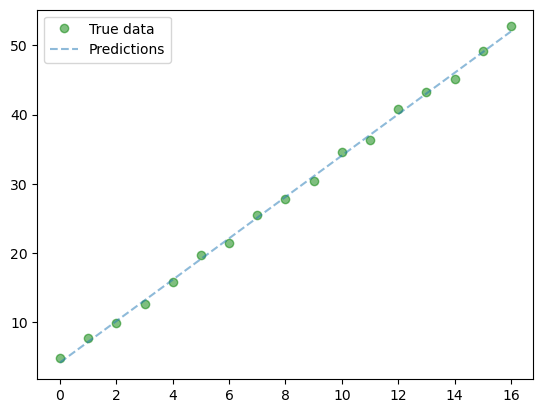

In [309]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if enableGpu:
        predicted = model(Variable(torch.from_numpy(train_x).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(train_x))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(train_x, train_y, 'go', label='True data', alpha=0.5)
plt.plot(train_x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()